In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from collections import Counter
%matplotlib inline

In [2]:
lattice = 64

In [3]:
def IsEven(x):
    if x % 2:
        return False
    else:
        return True

In [4]:
def Cantor_Pairing(a,b):
    return int(0.5*(a+b)*(a+b+1)+b)

In [5]:
def CornersFromXY(x,y):
    if IsEven(x):
        if IsEven(y):
            return [[x+1,y],[x,y+1],[x+2,y+1]]
        else:
            return [[x+1,y+1],[x,y],[x+2,y]]
    else:
        if IsEven(y):
            return [[x+1,y+1],[x,y],[x+2,y]]
        else:
            return [[x+1,y],[x,y+1],[x+2,y+1]]

In [6]:
y = np.linspace(0,lattice*np.sqrt(3.0)/2.0,lattice+1)
x = []
for yi, yy in enumerate(y):
    if IsEven(yi):
        if IsEven(lattice):
            xx = np.linspace(0.5, 0.5+(lattice/2.0),round((lattice/2)+1))
        else:
            xx = np.linspace(0.5, 0.5+((lattice-1)/2.0), round(((lattice-1)/2)+1))
    else:
        if IsEven(lattice):
            xx = np.linspace(0, (lattice/2.0),round((lattice/2)+1))
        else:
            xx = np.linspace(0, ((lattice+1)/2.0), round(((lattice+1)/2)+1))
    x.append(xx)
xy = []
for i in range(0,len(y)):
    xx = x[i]
    yy = y[i]
    for j in range(0,len(xx)):
        xy.append([xx[j],yy])
xy = np.asarray(xy)
xx = xy[:, 0]
yy = xy[:, 1]
triangulation = tri.Triangulation(xx,yy)

In [7]:
triangles = triangulation.triangles
countervalue = []
for triangle in triangles:
    if any(count > 1 for count in Counter(xx[triangle]).values()):
        countervalue.append(False)
    else:
        countervalue.append(True)
triangles = [triangles[i] for i in range(0,len(triangles)) if countervalue[i]]
triangulation.triangles = triangles

[]

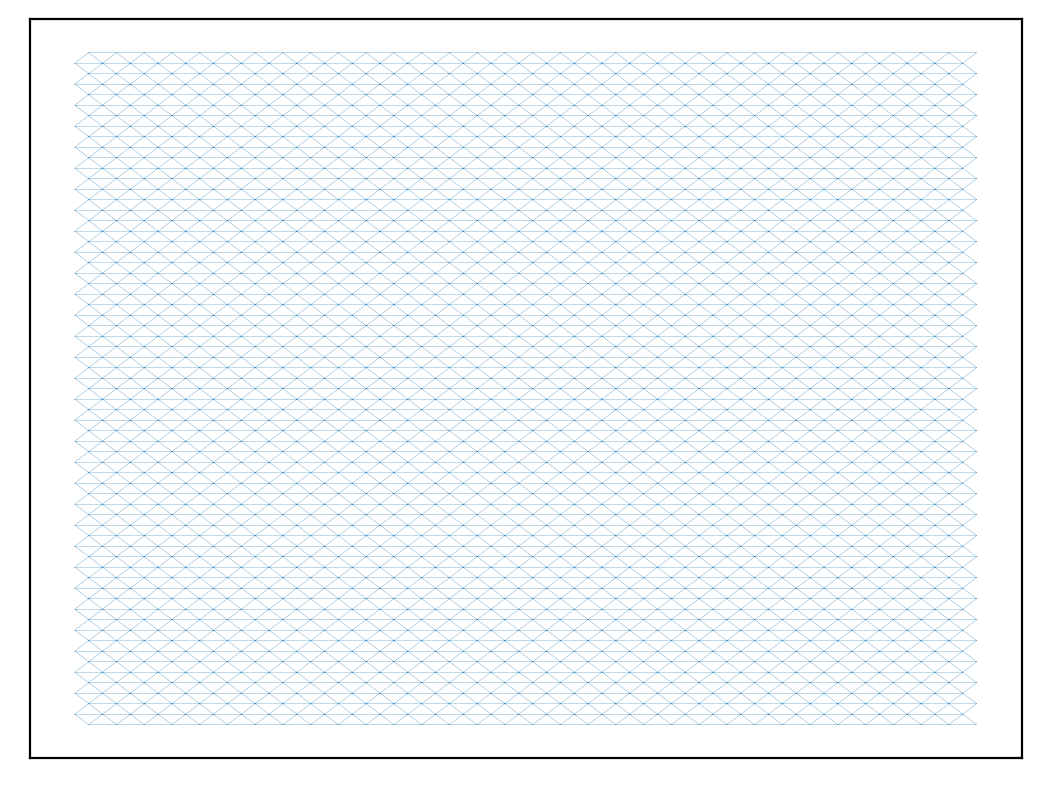

In [8]:
fig, ax = plt.subplots(dpi=200)
ax.triplot(triangulation, lw=0.1)
ax.set_xticks([])
ax.set_yticks([])

In [9]:
triangles = triangulation.triangles
better_triangles = []
for triangle in triangles:
    xtri = np.round(xx[triangle]/0.5).astype(int)
    ytri = np.round(yy[triangle]/(np.sqrt(3.0)/2.0)).astype(int)
    tricoos = [[xtri[i],ytri[i]] for i in range(3)]
    better_triangles.append(tricoos)

In [10]:
cantorlist = []
my_tri_list = []
for i in range(lattice):
    for j in range(lattice):
        cantorlist.append(Cantor_Pairing(i,j))
        corners = CornersFromXY(i,j)
        for k in range(len(better_triangles)):
            if (corners[0] in better_triangles[k]) and (corners[1] in better_triangles[k]) and (corners[2] in better_triangles[k]):
                my_tri_list.append(k)

In [11]:
facecolors = np.empty(len(triangles))
facecolors[:] = np.nan
for i in range(len(cantorlist)):
    facecolors[my_tri_list[i]]=cantorlist[i]

Text(0.5, 1.0, 'tripcolor of Delaunay triangulation, flat shading')

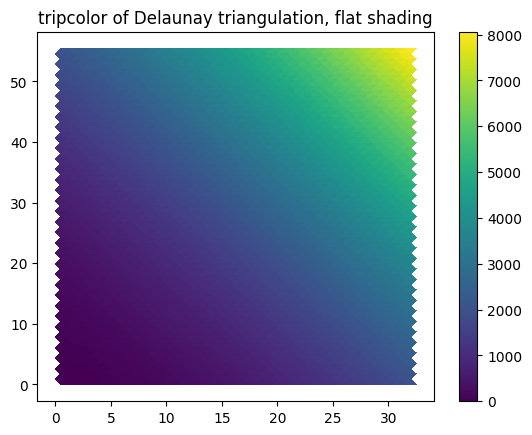

In [12]:
fig1, ax1 = plt.subplots()
tpc = ax1.tripcolor(triangulation, facecolors=facecolors, shading='flat')
fig1.colorbar(tpc)
ax1.set_title('tripcolor of Delaunay triangulation, flat shading')

[]

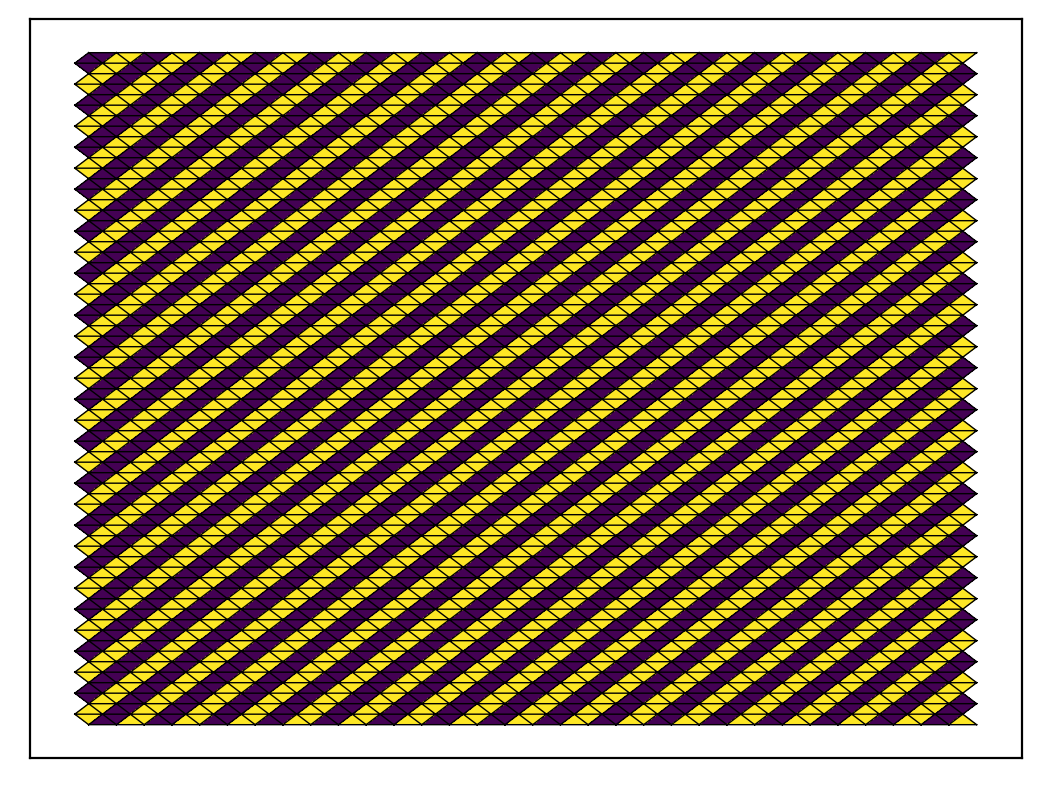

In [13]:
facecolors2 = [IsEven(i) for i in facecolors]
fig, ax = plt.subplots(dpi=200)
tpc = ax.tripcolor(triangulation, facecolors=facecolors2)
ax.triplot(triangulation, lw=0.5, color='k')
ax.set_xticks([])
ax.set_yticks([])

[]

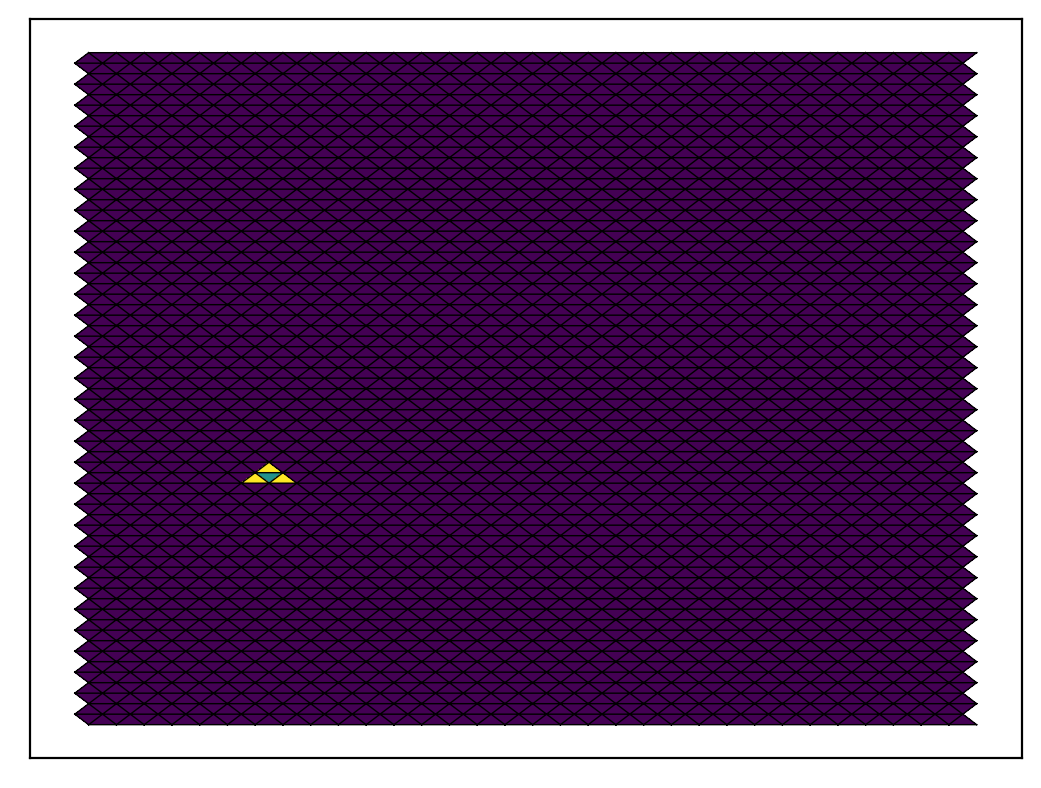

In [24]:
chosenx = 13
choseny = 23
my_tri = 0
corners = CornersFromXY(chosenx, choseny)
for k in range(len(better_triangles)):
    if (
        (corners[0] in better_triangles[k])
        and (corners[1] in better_triangles[k])
        and (corners[2] in better_triangles[k])
    ):
        my_tri = k
        break


nb = []
if IsEven(chosenx + choseny):
    nb.append([chosenx-1,choseny])
    nb.append([chosenx+1,choseny])
    nb.append([chosenx,choseny+1])    
else:
    nb.append([chosenx-1,choseny])
    nb.append([chosenx+1,choseny])
    nb.append([chosenx,choseny-1])

my_tris = []
for i in nb:
    corners = CornersFromXY(i[0], i[1])
    for k in range(len(better_triangles)):
        if (
            (corners[0] in better_triangles[k])
            and (corners[1] in better_triangles[k])
            and (corners[2] in better_triangles[k])
        ):
            my_tris.append(k)
            break

facecolors3 = np.zeros(len(triangles))
facecolors3[my_tri] = 5
for triindex in my_tris:
    facecolors3[triindex]=10


fig, ax = plt.subplots(dpi=200)
tpc = ax.tripcolor(triangulation, facecolors=facecolors3)
ax.triplot(triangulation, lw=0.5, color='k')
ax.set_xticks([])
ax.set_yticks([])